Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [9]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


Q2. Load the Wine Quality dataset and explore its dimensions.

In [10]:
import pandas as pd

# Load the dataset
data_path = '/content/wine.data'
column_names = [
    'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline', 'Class'
]
df = pd.read_csv(data_path, names=column_names)

# Explore dimensions
print("Dimensions of the dataset:", df.shape)
df.head()

Dimensions of the dataset: (178, 14)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Q3. Check for null values, identify categorical variables, and encode them.

In [11]:
# Check for null values
print("Null values in each column:\n", df.isnull().sum())

# Identify and encode categorical variables (if any)
# In this dataset, the 'Class' column is categorical
df['Class'] = df['Class'].astype('category').cat.codes

Null values in each column:
 Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Class                           0
dtype: int64


Q4. Separate the features and target variables from the dataframe.

In [12]:
# Separate features and target variables
X = df.drop('Class', axis=1)
y = df['Class']

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [13]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (106, 13)
Validation set size: (36, 13)
Test set size: (36, 13)


Q6. Perform scaling on the dataset.

In [14]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.


Since the 'Class' variable has multiple categories, we will create an output layer with softmax activation.

Q8. Create a Sequential model and add all the layers to it.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(y.unique()), activation='softmax')
])

Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [16]:
from tensorflow.keras.callbacks import TensorBoard

# Implement TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Implement Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Implement ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')


Q12. Print the model summary.

In [19]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Q14. Compile the model with the specified loss function, optimizer, and metrics.

Already covered above.

Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [21]:
# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)


Epoch 1/100
4/4 [==============================] - 4s 189ms/step - loss: 5.2328 - accuracy: 0.0094 - val_loss: 4.7681 - val_accuracy: 0.0556
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 5.1320 - accuracy: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 75ms/step - loss: 5.1626 - accuracy: 0.0094 - val_loss: 4.7672 - val_accuracy: 0.0556
Epoch 3/100
4/4 [==============================] - 0s 58ms/step - loss: 5.1972 - accuracy: 0.0283 - val_loss: 4.7668 - val_accuracy: 0.0556
Epoch 4/100
4/4 [==============================] - 0s 52ms/step - loss: 5.1128 - accuracy: 0.0000e+00 - val_loss: 4.7669 - val_accuracy: 0.0556
Epoch 5/100
4/4 [==============================] - 0s 52ms/step - loss: 5.0079 - accuracy: 0.0094 - val_loss: 4.7687 - val_accuracy: 0.0278
Epoch 6/100
4/4 [==============================] - 0s 56ms/step - loss: 4.8543 - accuracy: 0.0094 - val_loss: 4.7707 - val_accuracy: 0.0278
Epoch 7/100
4/4 [==============================] - 0s 65ms/step - loss: 4.9094 - accuracy: 0.0094 - val_loss: 4.7729 - val_accuracy: 0.0278
Epoch 8/100
4/4 [==============================] - 0s 53ms/step - loss: 5.0411 - accuracy: 0.0094 - val_loss: 4.7742 - val_accuracy: 0.0278
Epoch 9/100
4/4 [===========

Q16. Get the model's parameters.

In [22]:
# Get the model's parameters
model_params = model.get_weights()

Q17. Store the model's training history as a Pandas DataFrame.

In [23]:
# Store the training history
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,5.232788,0.009434,4.768146,0.055556
1,5.162566,0.009434,4.767192,0.055556
2,5.197211,0.028302,4.766823,0.055556
3,5.112775,0.000000,4.766950,0.055556
4,5.007899,0.009434,4.768664,0.027778


Q18. Plot the model's training history.

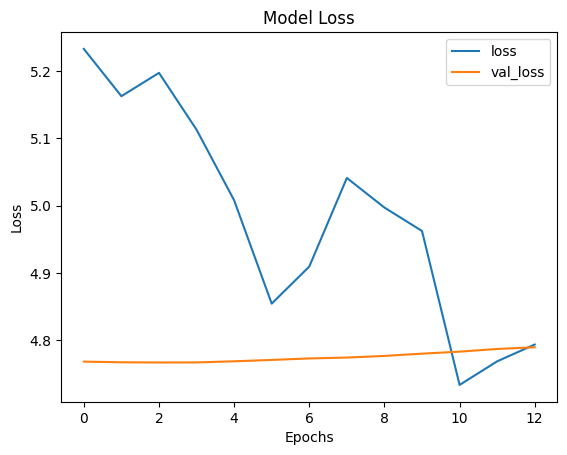

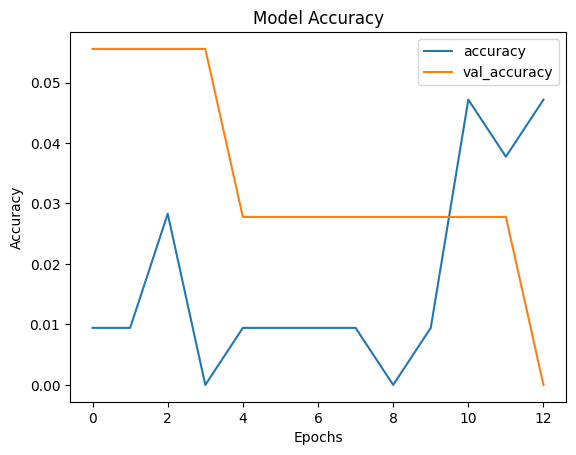

In [24]:
import matplotlib.pyplot as plt

# Plot training history
history_df[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Q19. Evaluate the model's performance using the test data.

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

2/2 [==============================] - 0s 7ms/step - loss: 4.7758 - accuracy: 0.0278
Test Loss: 4.775812149047852
Test Accuracy: 0.02777777798473835
